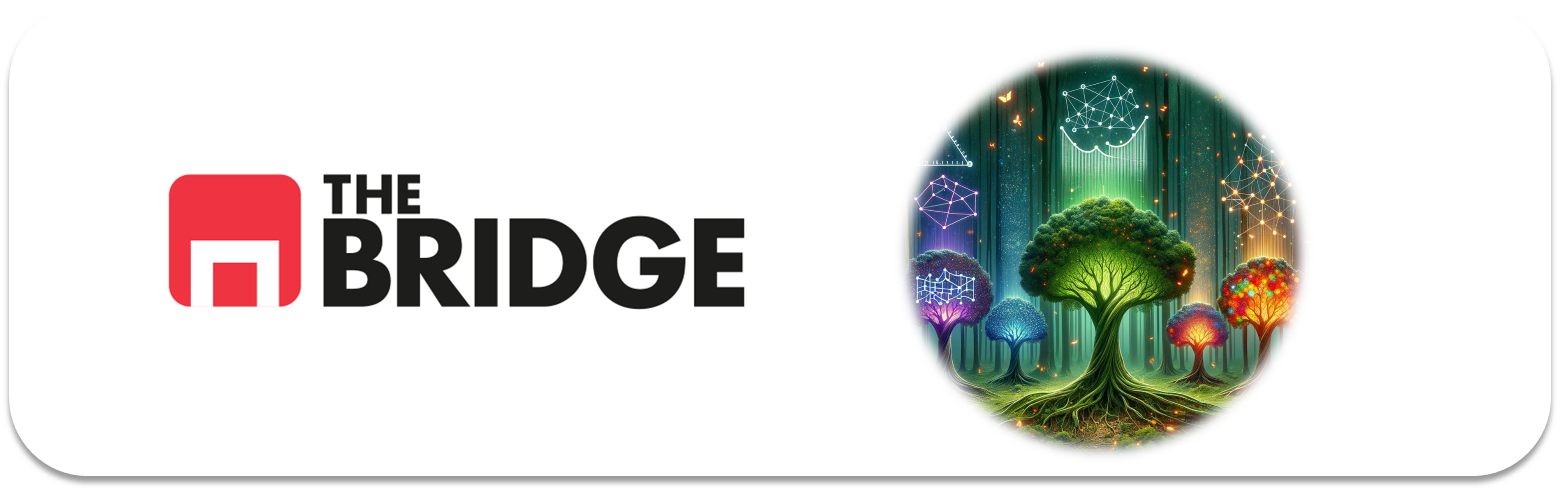

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### IMPORTS

In [224]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,make_scorer,recall_score
from sklearn.model_selection import train_test_split

In [225]:
import warnings
warnings.filterwarnings("ignore")

### PRIMER VISTAZO

In [226]:
df = pd.read_csv("./data/bank-full.csv", sep = ";")

In [227]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [229]:
target = "y"

In [230]:
# Analisis de "unkown"

for col in df.columns:
    print(f"Para {col}, unkowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)

Para age, unkowns o missings: 0
Para job, unkowns o missings: 288, 0.64%
Para marital, unkowns o missings: 0
Para education, unkowns o missings: 1857, 4.11%
Para default, unkowns o missings: 0
Para balance, unkowns o missings: 0
Para housing, unkowns o missings: 0
Para loan, unkowns o missings: 0
Para contact, unkowns o missings: 13020, 28.8%
Para day, unkowns o missings: 0
Para month, unkowns o missings: 0
Para duration, unkowns o missings: 0
Para campaign, unkowns o missings: 0
Para pdays, unkowns o missings: 0
Para previous, unkowns o missings: 0
Para poutcome, unkowns o missings: 36959, 81.75%
Para y, unkowns o missings: 0


In [231]:
df.shape

(45211, 17)

In [232]:
# Miro con más detalle las que tienen un porcentaje alto (contact y poutcome)
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

*Me la quedo provisionalmente, lo que tendré que entender es el encoding*

In [233]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

*Ocurre igual que con el campo anterior, por ahora me lo quedo y al analizarla bivariantemente con el target ya decidiré*

*En definitiva, las variables con "faltantes" o "unkowns" son todas categóricas, los missings los considero un valor más y veo en el bivariante qué hacer.*


### TRAIN/TEST

In [234]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify=df['y'],random_state= 42)

### MINIEDA

In [235]:
#### Distribución del target

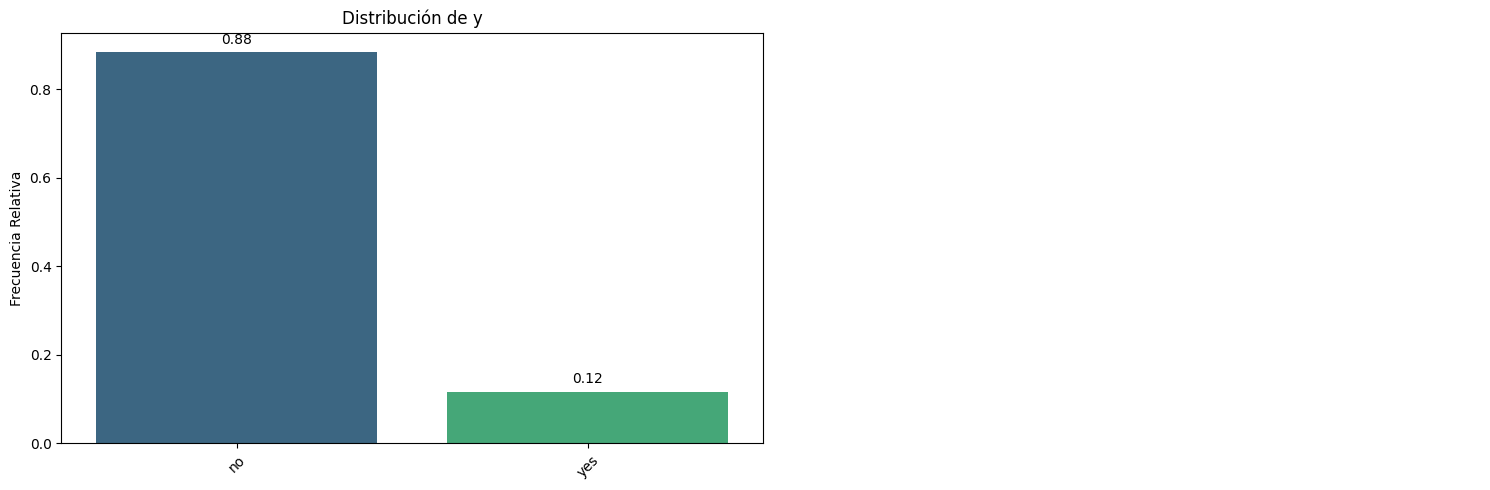

In [236]:
bt.pinta_distribucion_categoricas(train_set, [target], relativa= True, mostrar_valores= True)

*Esto es un ejemplo claro de target no equilibrado o desbalanceado. Por lo menos usaremos hoy el hiperparámetro de class_weight*

In [237]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 24001 to 44229
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [238]:
train_set.y.value_counts(True)

y
no     0.883018
yes    0.116982
Name: proportion, dtype: float64

In [239]:
test_set.y.value_counts(True)

y
no     0.883003
yes    0.116997
Name: proportion, dtype: float64

In [240]:
train_set_bck = train_set.copy()

In [241]:
features_cat = train_set.select_dtypes(include = "object").columns.to_list()
if target in features_cat:
    features_cat.remove(target)
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [242]:
features_num = [col for col in train_set.columns if col not in features_cat and col != target]
features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

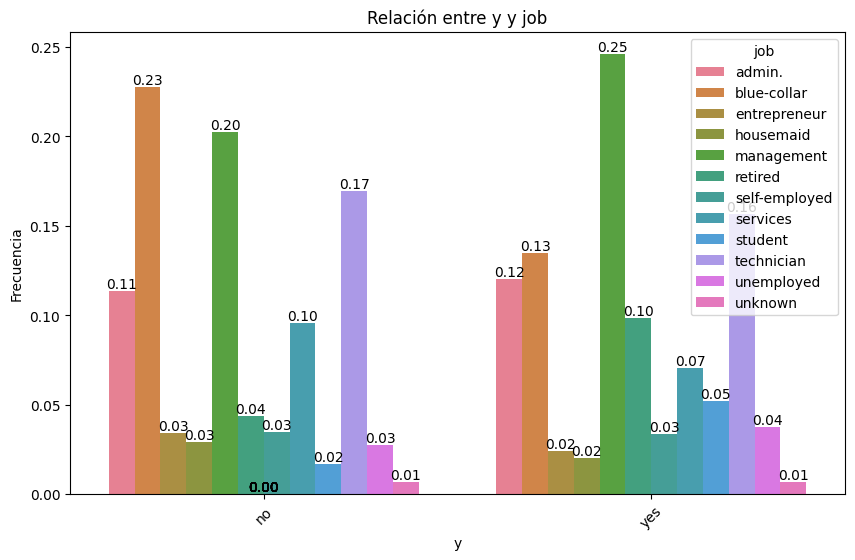

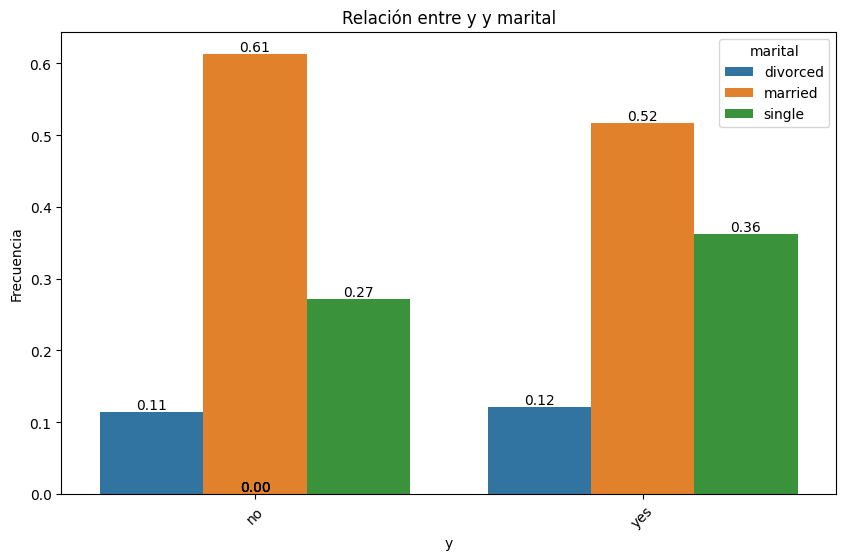

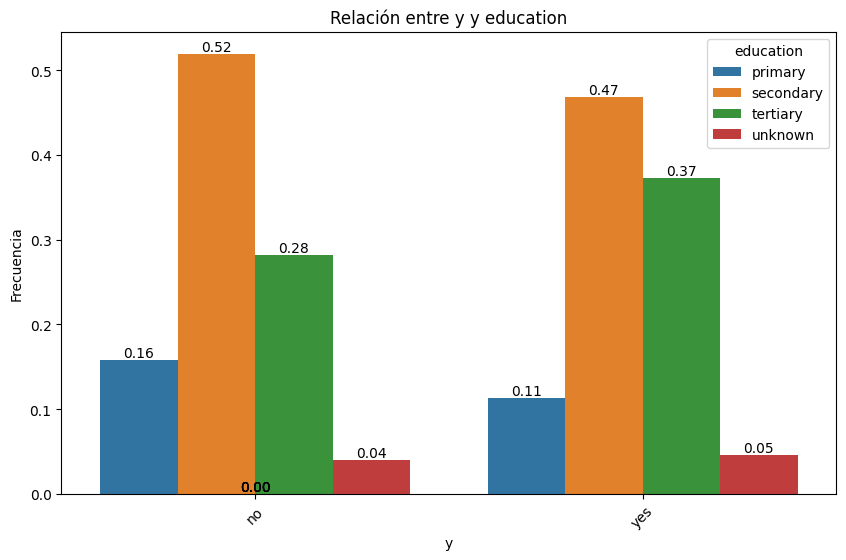

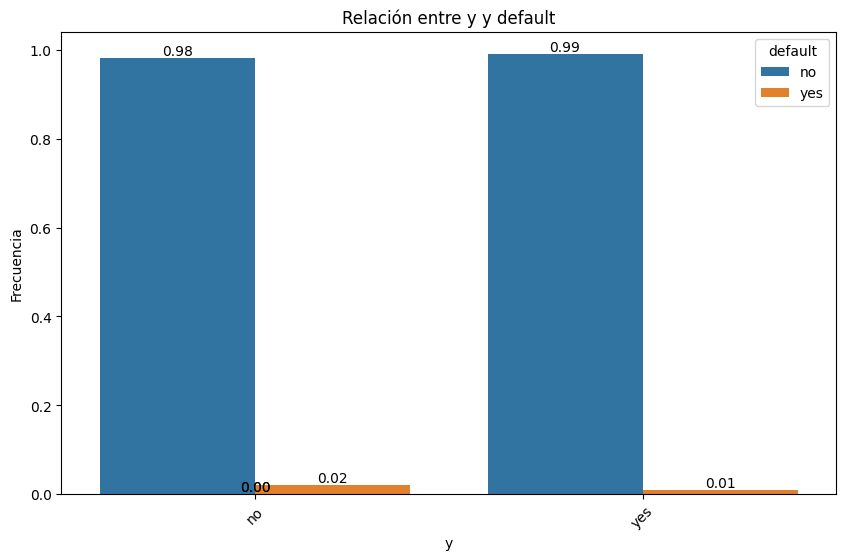

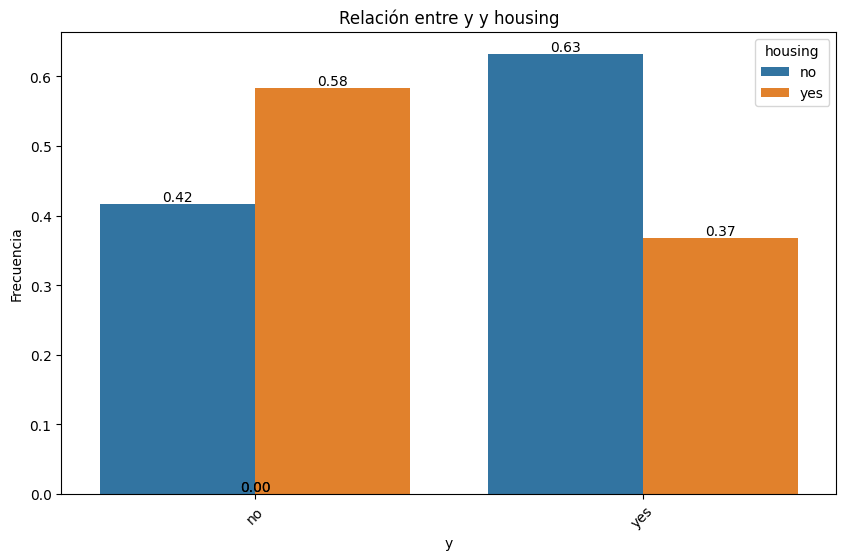

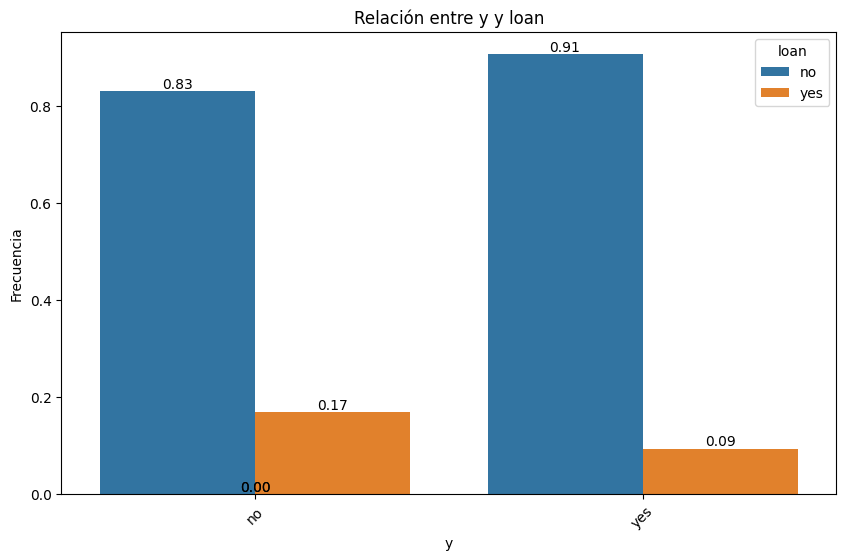

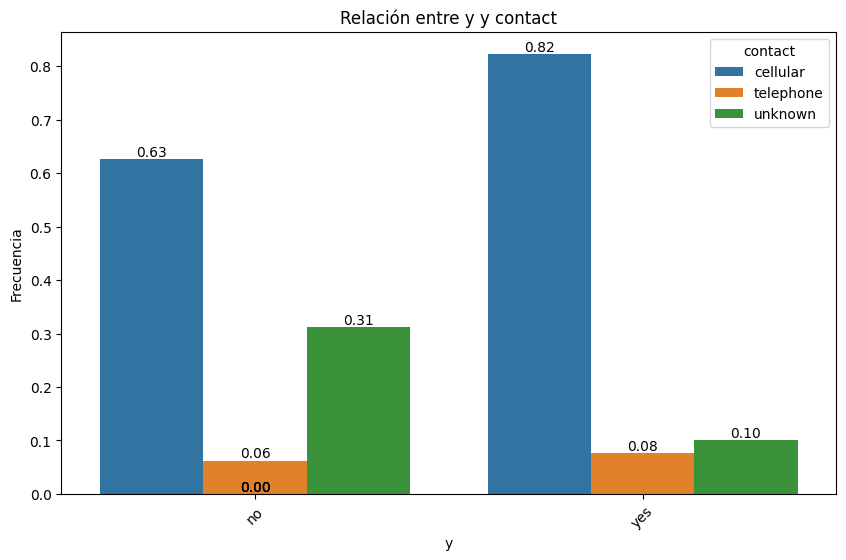

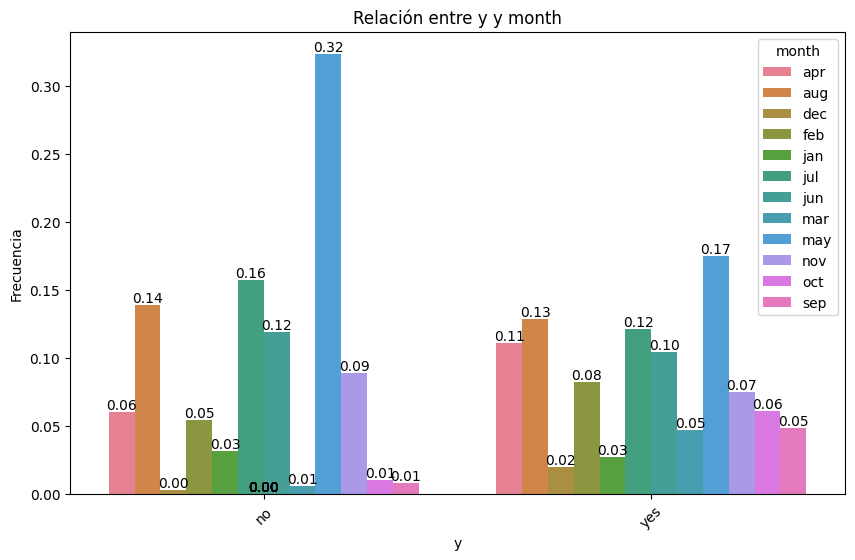

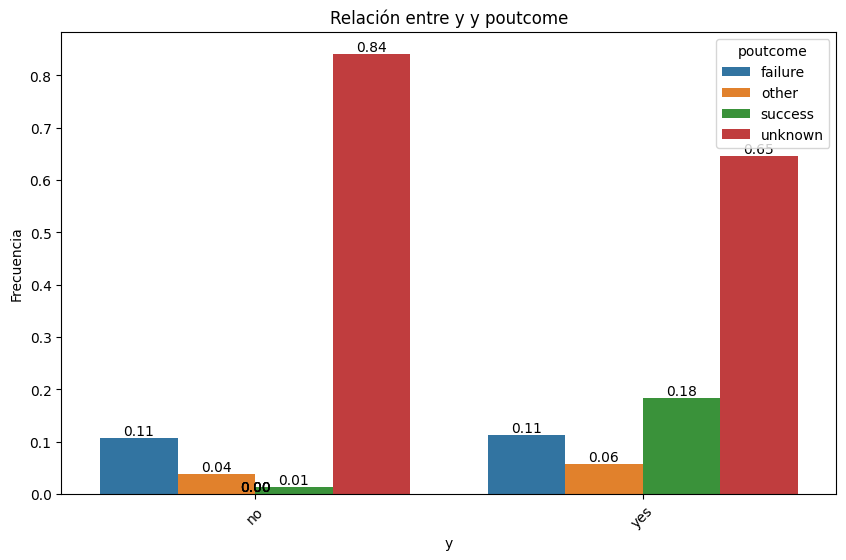

In [243]:
### Analizamos categóricas

for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)

*Proceso para probar job y month*


In [244]:
features_cat_sel1 = ["job","housing","contact","poutcome"]
features_cat_sel2 = ["marital", "education","loan","month"]
pobrecillas = ["default"]

In [245]:
onehot = ['job','contact','poutcome']


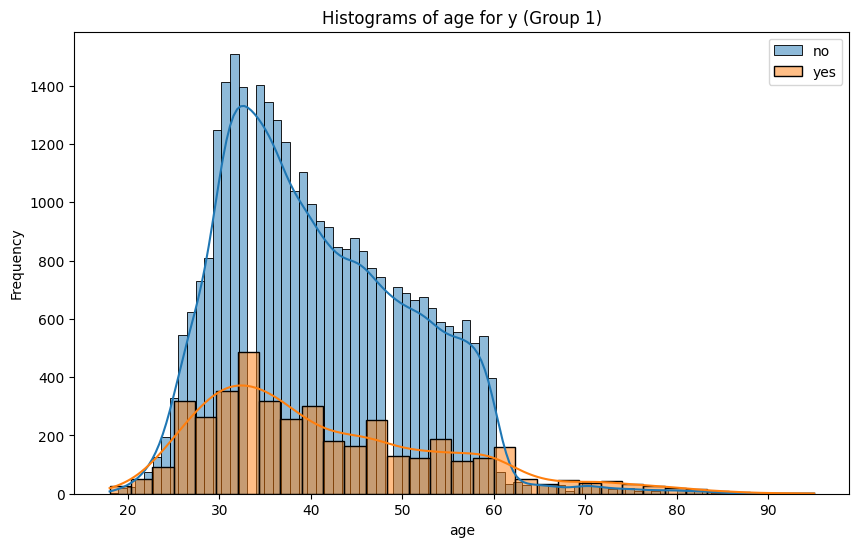

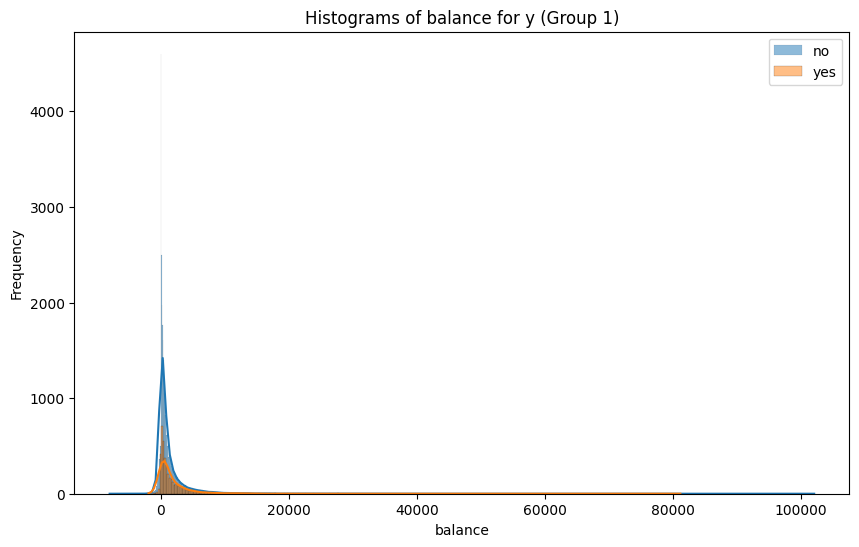

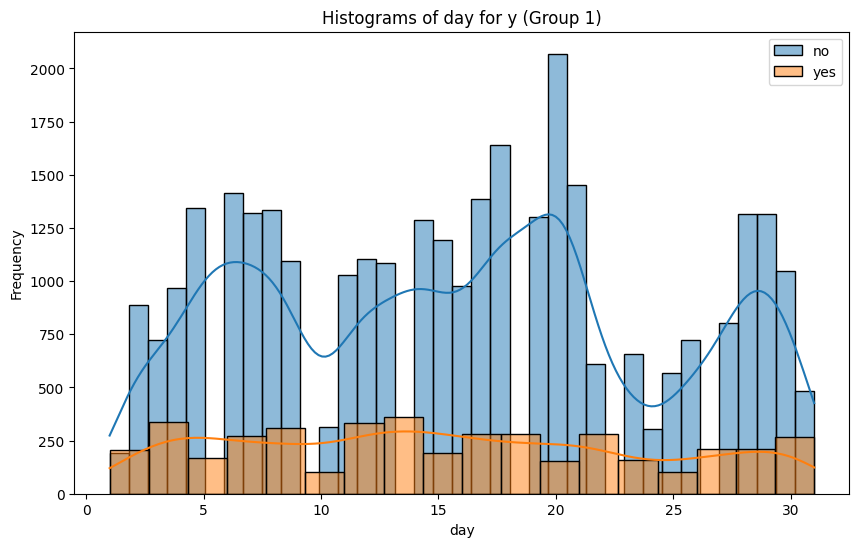

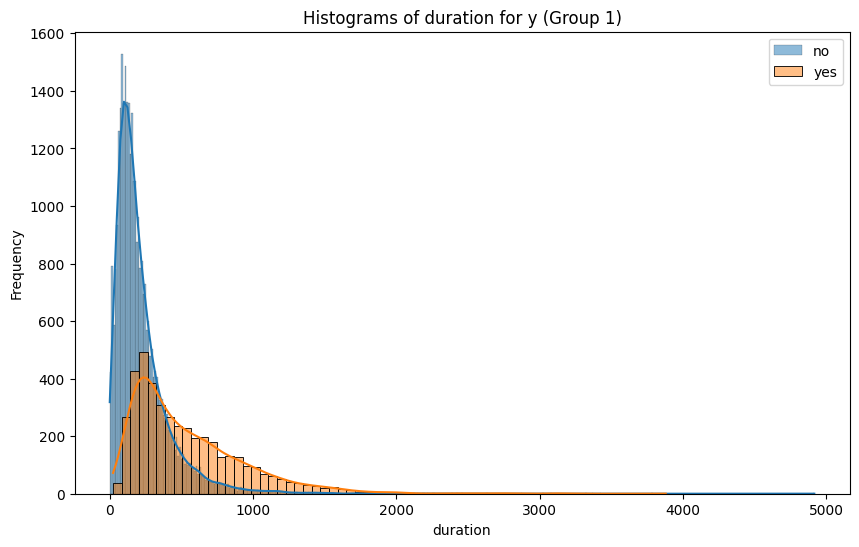

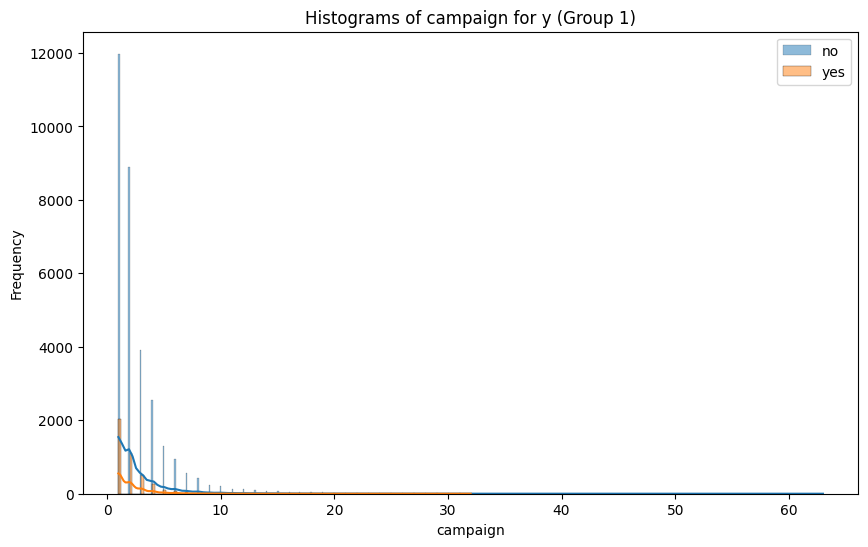

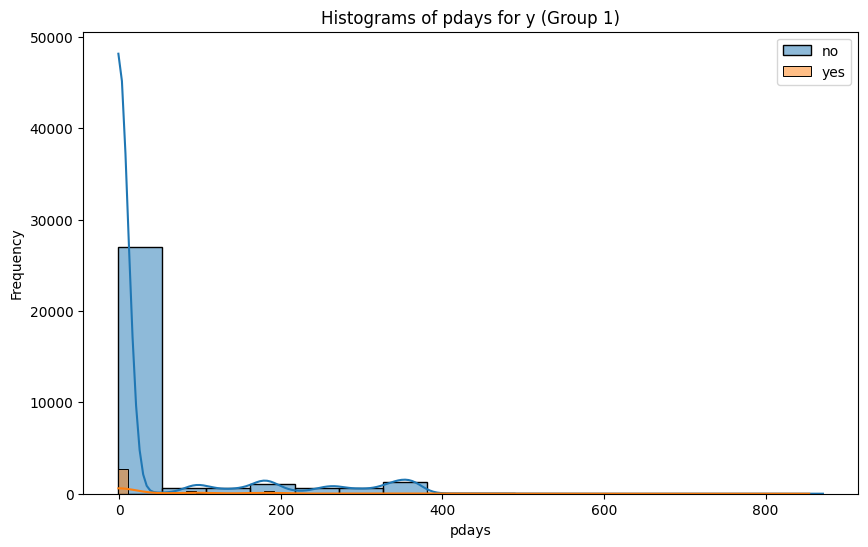

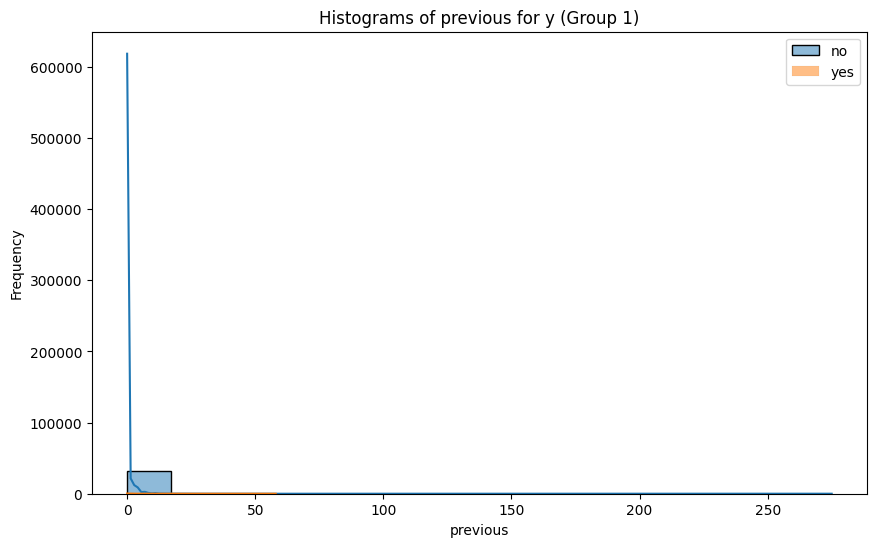

In [246]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [247]:
features_num = ["age","day","duration","pdays"]
features_num_2 = ["previous"]

### Tratamiento

Categóricas:


In [248]:
train_set["housing"] = train_set["housing"] == "yes"
train_set["loan"] = train_set["loan"] == "yes"
features_cat.remove("housing")
features_cat.remove("loan")

In [249]:
test_set["housing"] = test_set["housing"] == "yes"
test_set["loan"] = test_set["loan"] == "yes"

In [250]:
onehot

['job', 'contact', 'poutcome']

In [251]:
train_set = pd.get_dummies(train_set, columns = onehot, dtype = int)
test_set = pd.get_dummies(test_set, columns = onehot, dtype = int)

In [252]:
mapeo = {
    'ene':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

In [253]:
train_set['month'] = train_set['month'].map(mapeo)
test_set['month'] = test_set['month'].map(mapeo)

features_num: En principio no pasa nada por no escalar, podemos hacerlo  y probar dos modelos. Pero como hacer un baseline con logística, a la logística sí que le afecta y bastante.

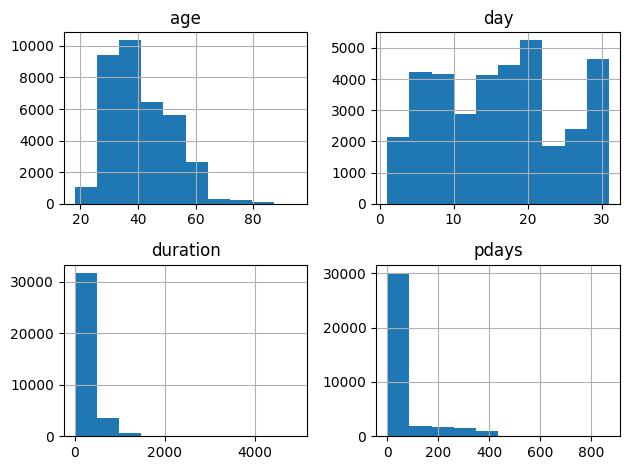

In [254]:
train_set[features_num].hist()
plt.tight_layout()

In [255]:
train_set["contacted_before"] = train_set["pdays"].apply(lambda row: 1 if row >= 0 else 0)
train_set.contacted_before.value_counts(True)

contacted_before
0    0.817961
1    0.182039
Name: proportion, dtype: float64

In [256]:
test_set["contacted_before"] = test_set["pdays"].apply(lambda row: 1 if row >= 0 else 0)

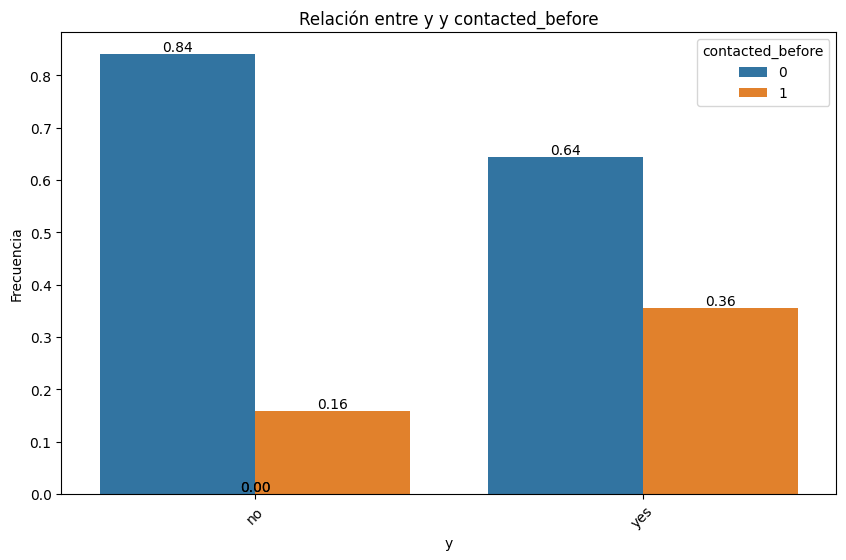

In [257]:
bt.plot_categorical_relationship_fin(train_set, target, "contacted_before", relative_freq= True, show_values= True)

In [258]:
#bt.plot_grouped_histograms(train_set[train_set.contacted_before == 1], cat_col= target, num_col= "pdays", group_size= 2)

In [259]:
train_set["contacted_before"] = train_set["pdays"] != -1
features_cat_sel1.append("contacted_before")
test_set["contacted_before"] = test_set["pdays"] != -1
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [260]:
features_num

['age', 'day', 'duration', 'pdays']

In [261]:
train_set_scaled["duration"] = np.log(train_set_scaled["duration"] + 1)
train_set_scaled["pdays"] = np.log(train_set_scaled["pdays"] + 2)

In [262]:
test_set_scaled["duration"] = np.log(test_set_scaled["duration"] + 1)
test_set_scaled["pdays"] = np.log(test_set_scaled["duration"] + 2)

In [263]:
train_set_scaled[features_num]

,age,day,duration,pdays
24001,36,29,4.948760,0.000000
43409,24,5,6.811244,5.231109
20669,44,12,7.459339,0.000000
18810,48,31,3.583519,0.000000
23130,38,26,4.060443,0.000000
...,...,...,...,...
17958,50,30,4.077537,0.000000
15941,36,22,4.356709,0.000000
16952,45,25,4.595120,0.000000
34781,27,6,5.429346,0.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'pdays'}>]], dtype=object)

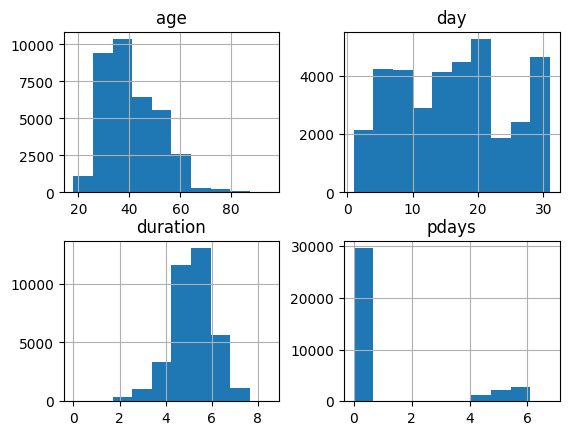

In [264]:
train_set_scaled[features_num].hist()

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])


### Importamos modelos, entrenamos, creamos el baseline

In [266]:

features_cat_sel1.remove('job')
#features_cat_sel1.remove('contacted_before')
features_cat_sel1.remove('contacted_before')

In [267]:
#x_train = train_set[features]

In [268]:
features_encoded_cat_sel1 = []
for col in features_cat_sel1:
    defintive_col = [col_2 for col_2 in train_set.columns if col_2.startswith(col)]
    features_encoded_cat_sel1 += defintive_col
features_encoded_cat_sel1

['housing',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'contacted_before',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [269]:
features_encoded_cat_sel1.remove('contacted_before')

In [270]:
#print(features_encoded_cat_sel1)

In [271]:
features_encoded_cat_sel1

['housing',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [272]:
def convertir(row):
    return 1 if row == "yes" else 0 


train_set[target] = train_set[target].apply(lambda row: 1 if row == "yes" else 0) # apply(convertir)
test_set[target] = test_set[target].apply(lambda row: 1 if row == "yes" else 0)


In [273]:
X_train = train_set[features_encoded_cat_sel1 + features_num].copy()
X_train_scaled = train_set_scaled[features_encoded_cat_sel1 + features_num].copy()
y_train = train_set[target]
X_test = test_set[features_encoded_cat_sel1 + features_num].copy()
X_test_scaled = test_set_scaled[features_encoded_cat_sel1 + features_num].copy()
y_test = test_set[target]


In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr_clf = LogisticRegression(max_iter = 1000)
tree_clf = DecisionTreeClassifier(random_state= 42)

lr_clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [275]:
print(classification_report(y_test, lr_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.65      0.30      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [276]:
lr_clf.fit(X_train, y_train)
print(classification_report(y_test, lr_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.65      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [277]:
tree_clf.fit(X_train, y_train)
print(classification_report(y_train, tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [278]:
#from sklearn.model_selection import cross_val_score
#print(np.mean(cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='balanced_accuracy')))
tree_clf

DecisionTreeClassifier(random_state=42)

In [279]:
#from sklearn.metrics import recall_score,make_scorer
#print(np.mean(cross_val_score(tree_clf,X_train,y_train,cv=5,scoring=make_scorer(recall_score,pos_label=1))))

### Balanced accuracy es el recall medio

In [280]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [1,2,8,10],
    "min_samples_leaf": [1,10,20,100],
    "class_weight": ["balanced",None]
}

tree_grid = GridSearchCV( tree_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = make_scorer(recall_score,pos_label=1) # Depende de "Negocio" del impacto en el problema de negocio
)
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 8, 10],
                         'min_samples_leaf': [1, 10, 20, 100]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1))

In [281]:
tree_grid.best_params_

{'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 20}

In [282]:
tree_grid.best_score_

0.8397601324100357

In [283]:
y_pred_train = tree_grid.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     31937
           1       0.35      0.87      0.50      4231

    accuracy                           0.80     36168
   macro avg       0.67      0.83      0.69     36168
weighted avg       0.91      0.80      0.83     36168



In [284]:
y_pred = tree_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7985
           1       0.34      0.83      0.48      1058

    accuracy                           0.79      9043
   macro avg       0.66      0.81      0.67      9043
weighted avg       0.90      0.79      0.82      9043



#### El 0.87 del recall para la clase positiva está muy bien, pero es a costa de una precisión muy baja en la clase positiva: lo que equivale a hacer el test a casi todos los de la población, así seguro que no fallas en ningún positivo. Probemos una estrategia de entrenamiento menos agresiva, otro scoring.

In [285]:
tree_grid.best_estimator_.feature_importances_

array([7.65739363e-02, 1.67499938e-03, 0.00000000e+00, 1.12775321e-01,
       1.40340202e-03, 1.93794108e-04, 1.65195180e-01, 0.00000000e+00,
       4.73834383e-02, 2.26317024e-02, 5.42919452e-01, 2.92487742e-02])

#### Esto tiene mala pinta

In [286]:
tree_grid.best_estimator_.feature_names_in_

array(['housing', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'age', 'day', 'duration',
       'pdays'], dtype=object)

Text(0.5, 1.0, 'RandomForest base on train data (best model)')

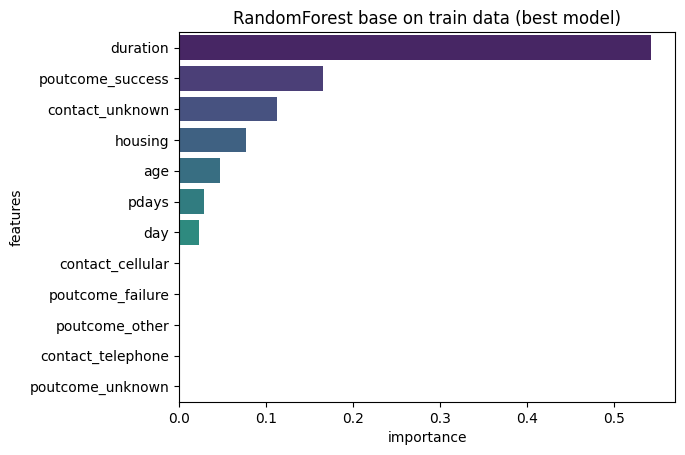

In [287]:
feature_importances = pd.DataFrame({"features": tree_grid.best_estimator_.feature_names_in_, "importance": tree_grid.best_estimator_.feature_importances_})
feature_importances.sort_values('importance',ascending=False,inplace=True)
sns.barplot(data=feature_importances,x='importance',y='features',palette='viridis')
plt.title('RandomForest base on train data (best model)')

In [288]:
#features_cat_sel1.remove('contacted_before')


#### Lo dicho, mala pinta las features. 
#### Ahora probamos con una función de scoring de recall balanceado entre las dos clases: balanced_accuracy (ya, el nombre está fatal puesto)

In [307]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [8,10,20,40],
    "min_samples_leaf": [10,20,100,200],
    "class_weight": ["balanced",None]
}

tree_grid = GridSearchCV( tree_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy" # Depende de "Negocio" del impacto en el problema de negocio
)
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [8, 10, 20, 40],
                         'min_samples_leaf': [10, 20, 100, 200]},
             scoring='balanced_accuracy')

In [308]:
tree_grid.best_params_

{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 100}

In [309]:
y_pred_train = tree_grid.best_estimator_.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     31937
           1       0.35      0.87      0.50      4231

    accuracy                           0.80     36168
   macro avg       0.67      0.83      0.69     36168
weighted avg       0.91      0.80      0.83     36168



In [310]:
y_pred = tree_grid.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7985
           1       0.34      0.84      0.48      1058

    accuracy                           0.79      9043
   macro avg       0.66      0.81      0.67      9043
weighted avg       0.90      0.79      0.82      9043



#### Este modelo equilibra más la precisión sin una gran pérdida de recall para la clase positiva. Además nos da hiperparámetros que aportan más certeza. También las feature_importances nos dan seguridad sobre el nuevo modelo.

In [292]:
tree_grid.best_score_

0.8166069625901843

In [293]:
tree_grid.best_estimator_.feature_importances_

array([7.66504467e-02, 1.71048493e-03, 0.00000000e+00, 1.13583117e-01,
       1.26705695e-03, 3.88132866e-04, 1.63970933e-01, 0.00000000e+00,
       4.71426917e-02, 2.85377618e-02, 5.47189818e-01, 1.95595567e-02])

Text(0.5, 1.0, 'RandomForest base on train data (best model)')

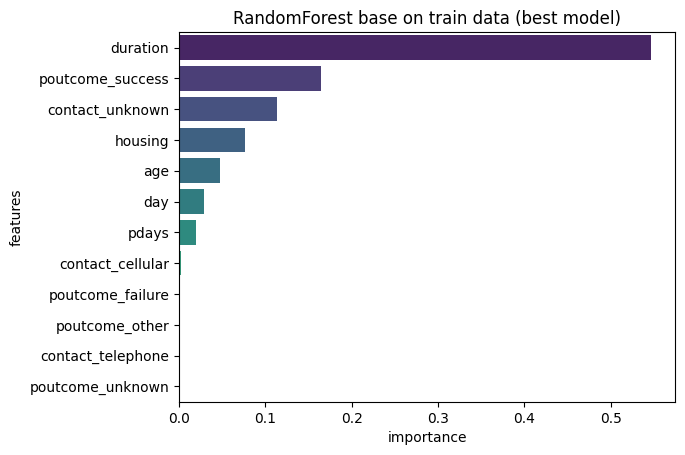

In [294]:
feature_importances = pd.DataFrame({"features": tree_grid.best_estimator_.feature_names_in_, "importance": tree_grid.best_estimator_.feature_importances_})
feature_importances.sort_values('importance',ascending=False,inplace=True)
sns.barplot(data=feature_importances,x='importance',y='features',palette='viridis')
plt.title('RandomForest base on train data (best model)')

#### Parece que job no aporta nada

In [295]:
#for col in features_cat:
#    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)
features_cat

['job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome']

In [296]:
train_set_bck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 24001 to 44229
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


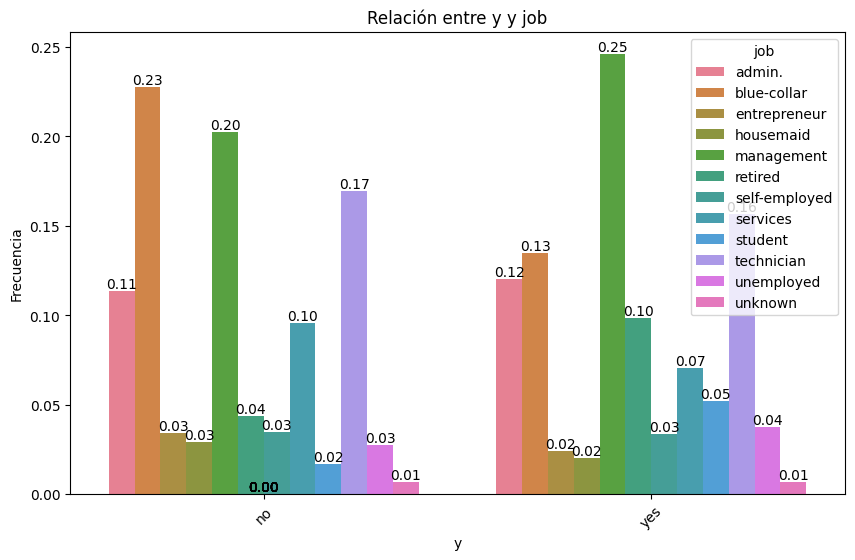

In [297]:
bt.plot_categorical_relationship_fin(train_set_bck, target, 'job', relative_freq= True, show_values= True)

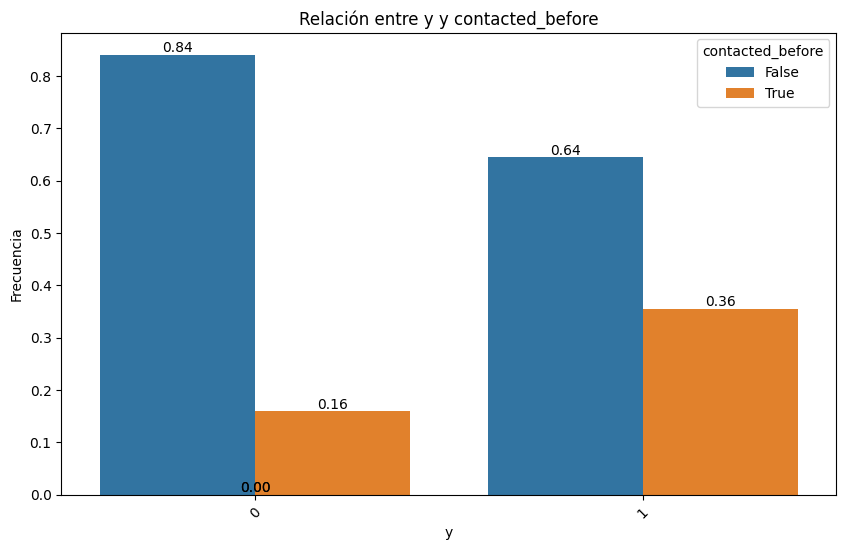

In [298]:
bt.plot_categorical_relationship_fin(train_set, target, 'contacted_before', relative_freq= True, show_values= True)

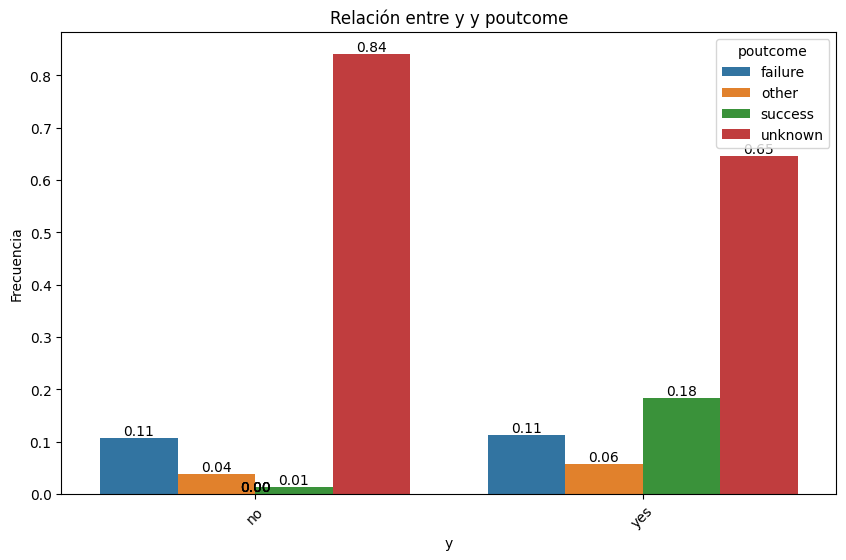

In [299]:
bt.plot_categorical_relationship_fin(train_set_bck, target, 'poutcome', relative_freq= True, show_values= True)

[Text(0.5866188226744186, 0.9545454545454546, 'x[10] <= 250.5\ngini = 0.5\nsamples = 36168\nvalue = [18084.0, 18084.0]'),
 Text(0.37990552325581395, 0.8636363636363636, 'x[6] <= 0.5\ngini = 0.392\nsamples = 23646\nvalue = [12770.972, 4667.39]'),
 Text(0.25690406976744184, 0.7727272727272727, 'x[10] <= 129.5\ngini = 0.333\nsamples = 23059\nvalue = [12609.028, 3380.866]'),
 Text(0.11300872093023256, 0.6818181818181818, 'x[10] <= 77.5\ngini = 0.169\nsamples = 12223\nvalue = [6828.286, 700.963]'),
 Text(0.055232558139534885, 0.5909090909090909, 'x[10] <= 60.5\ngini = 0.045\nsamples = 5729\nvalue = [3233.795, 76.935]'),
 Text(0.029069767441860465, 0.5, 'x[8] <= 29.5\ngini = 0.02\nsamples = 3796\nvalue = [2146.615, 21.371]'),
 Text(0.011627906976744186, 0.4090909090909091, 'x[9] <= 9.5\ngini = 0.102\nsamples = 400\nvalue = [224.797, 12.823]'),
 Text(0.005813953488372093, 0.3181818181818182, 'gini = 0.209\nsamples = 114\nvalue = [63.419, 8.548]'),
 Text(0.01744186046511628, 0.3181818181818182

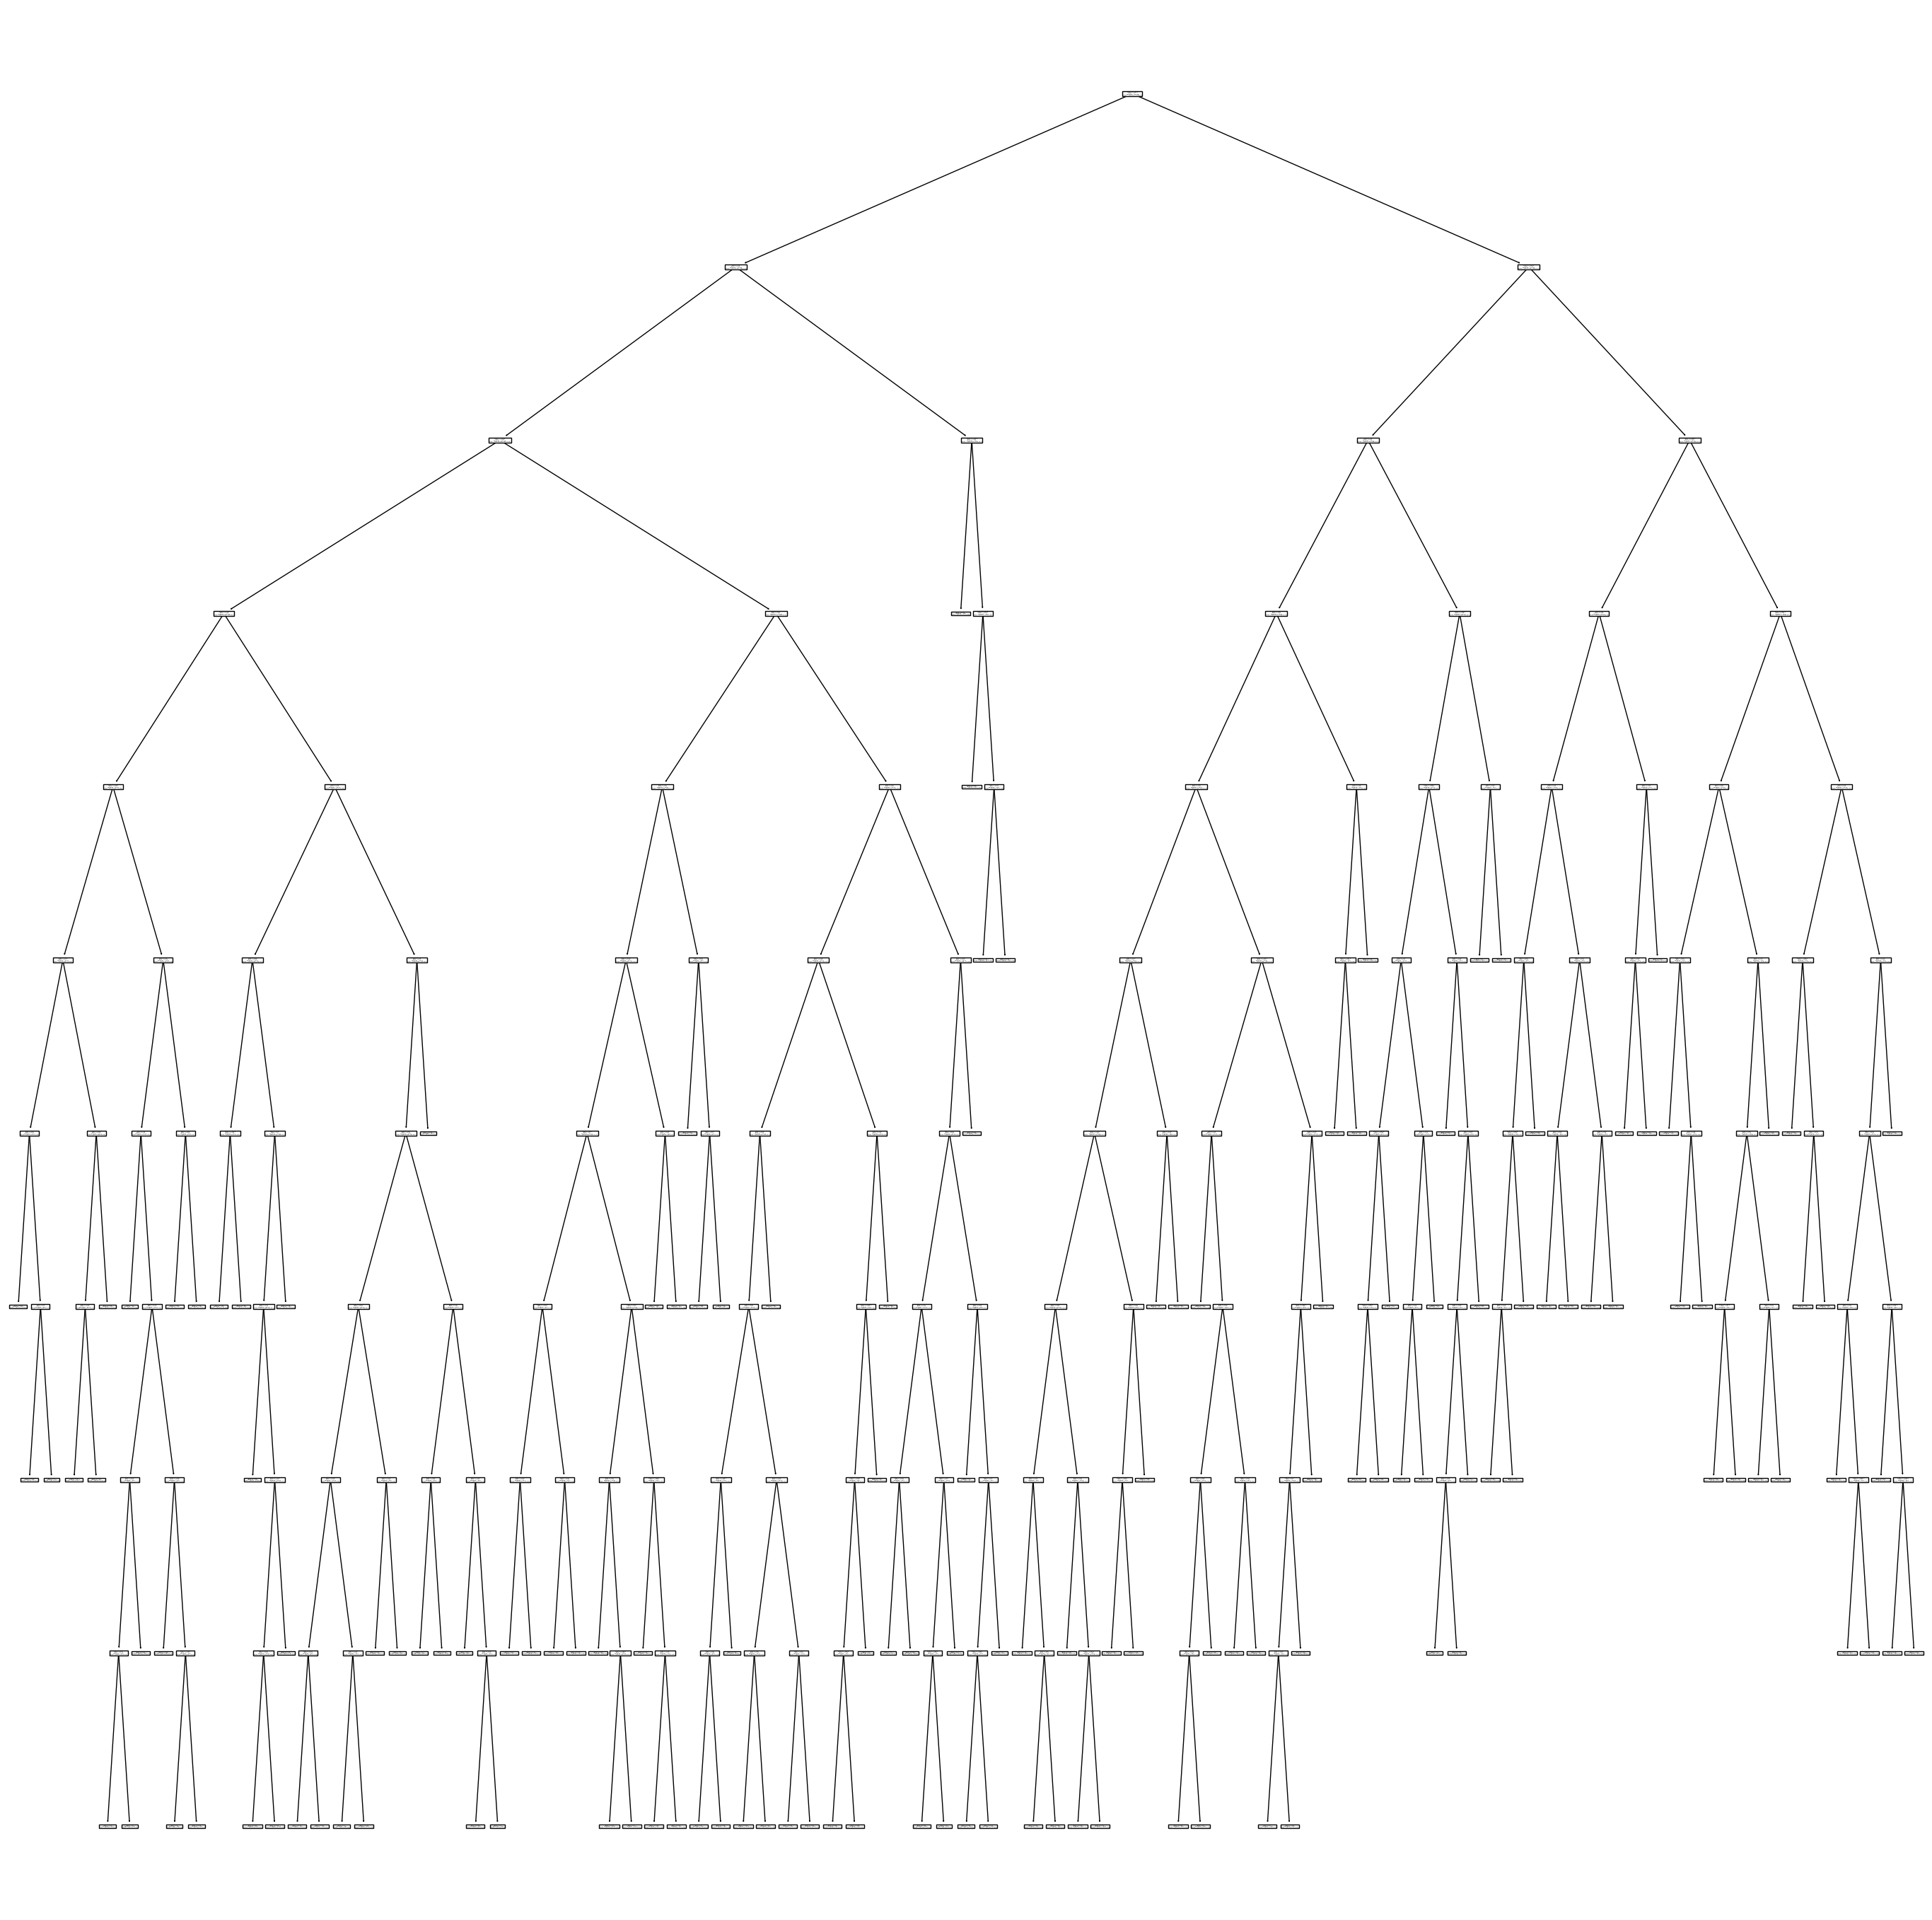

In [300]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(35,35))
plot_tree(tree_grid.best_estimator_)


In [301]:
fig.savefig('best_estimator_balanced_recall.png')